<p><b>COMP 499 - Project </b> </p>
<p><b>Name: Kisife Giles</b> </p>
<p><b>ID: 40001926 </b></p>

<p>Purpose of project: In developing countries, communicable diseases are often emphasized non-communicable diseases. This project attempts to use WHO data to analyze possible thrends mortality due to disease in these two categories. To do this, data from 1960 to 2004/2008 is analyzed for some countries in the developing as well as developed countries.</p>
<p>Data source:https://www.gapminder.org/data/</p>
<p>https://equityhealthj.biomedcentral.com/articles/10.1186/1475-9276-4-2</p>

<p><b>Countries Choosen:</b></p>
<p> Countries: Ghana, Nigeria, Kenya, Philippines, Chile, Zambia, Trinidad and Tobago and Colombia, India and China.</p>


Rationel:
Project on worl health.
Data source:https://www.gapminder.org/data/

--------------------------------------------------------------------------
(Original?, Interesting?, Challenging?)  for Questions
(Volume, Variety, Original) for Dataset
(Acquisition, Cleaning, Enrichment, Entity Resolution, Integration)  for wrangling

as these are the basis for the marks on those items. Mark it clear in your notebook, and presentation which of these you touched upon.

In [1]:
#imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<b>Data Acquisition/Loading and Characterization</b>

In [3]:
            #World economic growth 1960-2004
econ_df=pd.read_excel("data/gdp_pc_past_10yr_growth.xlsx")

            #Communicable disease data: Reported Deaths per 100000
malaria_df=pd.read_excel("data/malaria deaths_per_100000.xlsx")
tb_and_hiv = pd.read_excel("data/tb_with_hiv_deaths_per_100000.xlsx")

            #non-communicable disease data
 
# Blood pressure data
bp_females =pd.read_excel("data/SBP_females.xlsx")
bp_males =pd.read_excel("data/SBP_males.xlsx")

#Cholesterol levels in males and females
cholesterol_f_df=pd.read_excel("data/TC_female_ASM.xlsx")
cholesterol_m_df=pd.read_excel("data/TC_male_ASM.xlsx")

#Obesity levels: BMI index(kg/m2)
bmi_f_df=pd.read_excel("data/BMI_female_ASM.xlsx")
bmi_m_df=pd.read_excel("data/BMI_male_ASM.xlsx")

            #Cancer data
#Breast cancer mortality
brtm = pd.read_excel("data/breast_cancer_mortality.xlsx")
#Cervix cancer
cvc=pd.read_excel("data/cervical_cancer_mortality.xlsx")

#Colorectal cancer
colrec_m = pd.read_excel("data/colo_rectal_male.xlsx")
colrec_f = pd.read_excel("data/colo_rectal_female.xlsx")

#Liver cancer
colrec_m = pd.read_excel("data/liver_cancer_mortality_male.xlsx")
colrec_f = pd.read_excel("data/liver_cancer_mortality_female.xlsx")

#Stomach cancer data
stomach_f = pd.read_excel("data/stomach_cancer_mortality_female.xlsx")
stomach_m = pd.read_excel("data/stomach_cancer_mortality_male.xlsx")

#Lung cancer data
lung_f = pd.read_excel("data/lung_cancer_mortality_female.xlsx")
lung_m = pd.read_excel("data/lung_cancer_mortality_male.xlsx")

#Prostate cancer
prst =pd.read_excel("data/prostate_cancer_mortality.xlsx")



            #democracy indicator
democracy_df=pd.read_excel("data/indicatorpolityiv.xlsx")

            #Other factors
    
#Life expectancy at birth
life_expectancy_birth=pd.read_excel("data/life_expectancy_at_birth.xlsx")

#Number of physicians per 1000 patients
physicians_per_1000 = pd.read_excel("data/physicians_per_1000_people.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: 'data/gdp_pc_past_10yr_growth.xlsx'

<p>Characterization of variables. Since the datasets are very similar in structure, it is sufficient to characterize the variables in just one. To do this, I use a subset of the economic grouth dataset.</p>
<p> Categorical and numeric data....................</p>

In [4]:
df_subset=econ_df.iloc[0:10,0:5]
df_subset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Nation    10 non-null object
1960      3 non-null float64
1961      3 non-null float64
1962      3 non-null float64
1963      3 non-null float64
dtypes: float64(4), object(1)
memory usage: 480.0+ bytes


<p> <b> Data Wrangling and integration</b> </p>
<p> Data selection and preparation/reshaping. Transforming data rows into colums  </p>
<p> The countries choosen for each category are those with rich datasets. In some cases, missing data is replaced by data for the year 2002, a reference year </p>

In [5]:
#Data on economic growth
econ_df.head(3)

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.681010,-9.735691,-7.832190,-6.703747,-7.435903,-12.172492,-13.755837,-9.628362,-6.379329,-5.494353
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.272994,6.706477,11.155583,8.317806,6.722061
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.245647,-0.407905,-0.834492,-0.116493,0.058708,0.324176,0.335679,0.187646,0.988286,NaN


In [6]:
#Countries with full economic datasets
full_econ = econ_df.dropna()
print(list(full_econ['Nation']))

['Argentina', 'Australia', 'Austria', 'Belgium', 'Canada', 'Costa Rica', 'Denmark', 'Finland', 'France', 'Honduras', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Philippines', 'Portugal', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela, RB']


<p>Data on communicatble diseases: Malaria, TB and hiv</p>

In [7]:
#List of countries with full datasets on malaria

print(list(malaria_df.dropna()['Nation']))
full_malaria = malaria_df.dropna()

['Nigeria', 'South Africa', 'Cambodia', 'Laos', 'Philippines', 'Solomon Islands', 'Viet Nam']


In [8]:
#List of countries with full datasets on tubaclosis and hiv
print(list(tb_and_hiv.dropna()['Nation']))

['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica', 'Cuba', 'Czech Republic', "Cote d'Ivoire", 'Korea, Dem. Rep.', 'Congo, Dem. Rep.', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',

In [9]:
#Full datasets for TB and HIV
full_tb_and_hiv = tb_and_hiv.dropna()
print(list(full_tb_and_hiv['Nation']))

['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica', 'Cuba', 'Czech Republic', "Cote d'Ivoire", 'Korea, Dem. Rep.', 'Congo, Dem. Rep.', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',

In [10]:
#List of countries with full datasets on cholesterol values
print(list(cholesterol_f_df.dropna()['Nation']))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China',

Transforming and Visualizing data on economic growth for: Nigeria, Philipines, Cambodia and South Africa

User defined function to reshape(rotate and mutate) dataframes for plotting(visualization)

In [11]:
# This function takes as input, a 1 row dataframe and rotates it 90 degrees to convert row to columns,
# and adds a time series column with range start:end.

def mutateDF(df):
    if df is None:
        return
    col = df.columns
    start = col[1]
    end = col[len(col)-1]+1
    df_T = df.T
    df_T = df_T.drop([df_T.index[0]])
    df_T.columns=["Value"]
    df_T["Year"] = range(start,end,1)
    columnsTitles = ["Year","Value"]
    df_plot = df_T.reindex(columns = columnsTitles)
    return df_plot


In [12]:
#Select Economic growth datasets
econ_nigeria = full_econ[(full_econ['Nation']=='Nigeria')]
econ_philippines = full_econ[(full_econ['Nation']=='Philippines')]
econ_nigeria.head()


,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
124,Nigeria,4.390345,3.148914,2.574648,3.120009,2.779442,1.759564,1.206135,-0.592637,-1.071925,...,-0.0737,0.992307,1.336106,0.613551,0.417907,0.12864,-0.083353,0.062699,1.252725,1.320333


In [13]:
#Reshape the datasets
econ_nigeria_plot = mutateDF(econ_nigeria)
econ_philippines_plot = mutateDF(econ_philippines)
econ_nigeria_plot.head(2)

,Year,Value
1960,1960,4.39035
1961,1961,3.14891


Malaria datasets on Nigeria, Philippines

In [14]:
#Select datasets for malaria deaths per 1000 
malaria_nigeria = full_malaria[(full_malaria['Nation']=='Nigeria')]
malaria_philippines = full_malaria[(full_malaria['Nation']=='Philippines')]
malaria_philippines.tail(3)

,Nation,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
97,Philippines,1.491197,1.474393,1.347213,1.236106,1.168489,0.937495,0.76483,0.718087,0.767528,1.011613,0.703292,0.564022,0.123286,0.199575,0.201525,0.171463,0.126357


In [15]:
#Reshape datasets
malaria_nigeria_plot = mutateDF(malaria_nigeria)
malaria_philippines_plot = mutateDF(malaria_philippines)
malaria_philippines_plot.tail(3)

,Year,Value
2004,2004,0.201525
2005,2005,0.171463
2006,2006,0.126357


TB and HIV deaths in the Philippines and Nigeria

In [16]:
#Select datasets for TB infections
tb_and_hiv_nigeria = full_tb_and_hiv[(full_tb_and_hiv['Nation']=='Nigeria')]
tb_and_hiv_philippines = full_tb_and_hiv[(full_tb_and_hiv['Nation']=='Philippines')]
tb_and_hiv_philippines.tail()

,Nation,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
115,Philippines,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.2,0.3,0.3,0.3


In [17]:
tb_and_hiv_nigeria_plot = mutateDF(tb_and_hiv_nigeria)
tb_and_hiv_philippines_plot =  mutateDF(tb_and_hiv_philippines)
tb_and_hiv_philippines_plot.tail(3)

,Year,Value
2005,2005,0.3
2006,2006,0.3
2007,2007,0.3


Data Visualization

<IPython.core.display.Javascript object>


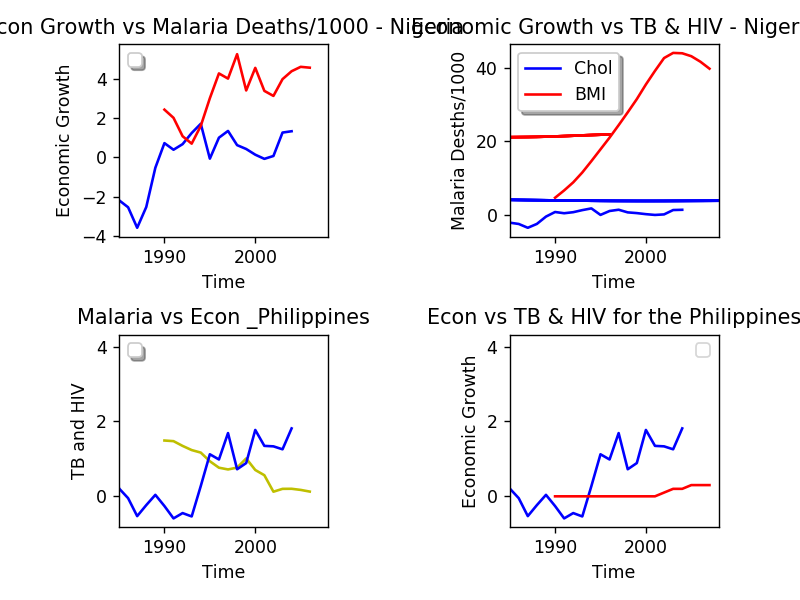

In [119]:

ax1 = fig.add_subplot(222)
ax1.set_title('Economic Growth vs TB & HIV - Nigeria')
ax1.set_xlabel('Time')
ax1.set_ylfig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.set_title('Econ Growth vs Malaria Deaths/1000 - Nigeria')
ax0.set_xlabel('Time')
ax0.set_ylabel('Economic Growth')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax0.legend(( 'Economic Growth'),loc='upper left', shadow=True)
ax0.set_xlim(1985,2008)
#plt.xticks(np.arange(min(econ_nigeria_plot.Year), max(econ_nigeria_plot.Year)+1, 10.0))
#ax0.set_xlim(1985,2008)
ax0.plot(econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',malaria_nigeria_plot.Year,malaria_nigeria_plot.Value,'r')

#abel('Malaria Desths/1000')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax1.legend(('Malaria Deaths/1000'),loc='upper left', shadow=True)
ax1.set_xlim(1985,2008)
ax1.plot(econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',tb_and_hiv_nigeria_plot.Year,tb_and_hiv_nigeria_plot.Value,'r')

ax2 = fig.add_subplot(223)
ax2.set_title('Malaria vs Econ _Philippines')
ax2.set_xlabel('Time')
ax2.set_ylabel('TB and HIV')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax2.legend(('Econ','TB and HIV'),loc='upper left', shadow=True)
ax2.set_xlim(1985,2008)
ax2.plot(malaria_philippines_plot.Year,malaria_philippines_plot.Value,'r',econ_philippines_plot.Year,econ_philippines_plot.Value,'b')



ax3 = fig.add_subplot(224)
ax3.set_title('Econ vs TB & HIV for the Philippines')
ax3.set_xlabel('Time')
ax3.set_ylabel('Economic Growth')
#ax1.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax3.legend(('Economic Growth','Malaria Desths/1000'),loc='upper right', shadow=False)
ax3.set_xlim(1985,2008)
ax3.plot(econ_philippines_plot.Year,econ_philippines_plot.Value,'b',tb_and_hiv_philippines_plot.Year,tb_and_hiv_philippines_plot.Value,'r')

#ax1.title('Philippines')
plt.tight_layout()
fig = plt.gcf()


<IPython.core.display.Javascript object>


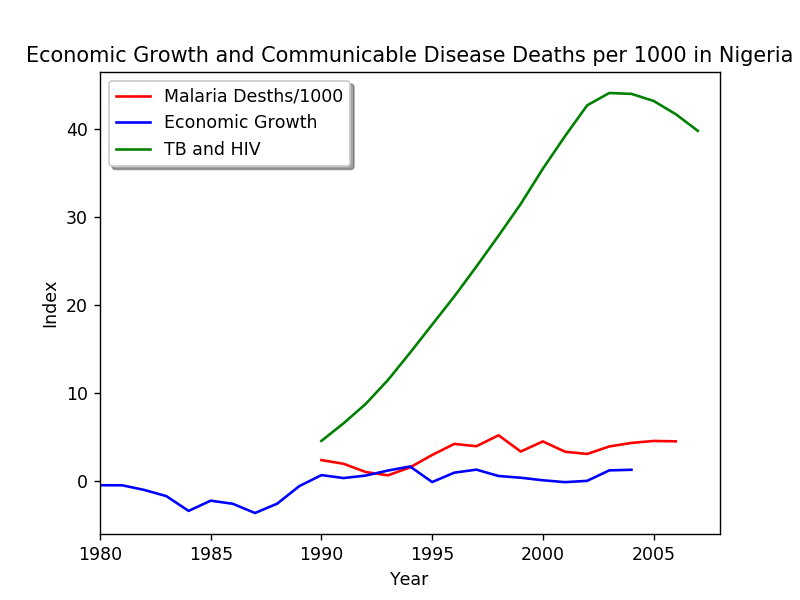

Text(0.5,1,'Economic Growth and Communicable Disease Deaths per 1000 in Nigeria')

In [96]:
#plt.figure(1)
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Index")

plt.plot(malaria_nigeria_plot.Year,malaria_nigeria_plot.Value,'r',econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',tb_and_hiv_nigeria_plot.Year,tb_and_hiv_nigeria_plot.Value,'g')
plt.legend(('Malaria Desths/1000', 'Economic Growth','TB and HIV'),loc='upper left', shadow=True)
plt.xlim(1980,2008)

plt.title('Economic Growth and Communicable Disease Deaths per 1000 in Nigeria')

<IPython.core.display.Javascript object>


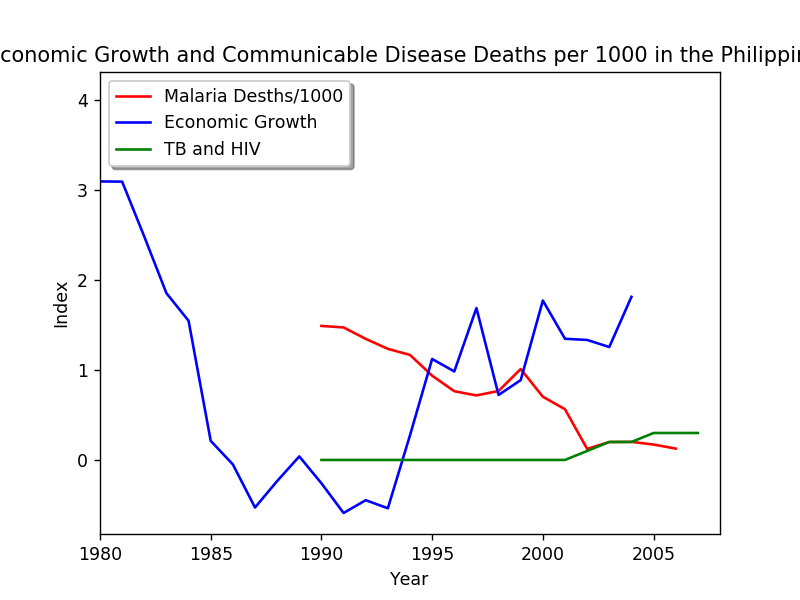

Text(0.5,1,'Economic Growth and Communicable Disease Deaths per 1000 in the Philippines')

In [19]:
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Index")
plt.plot(malaria_philippines_plot.Year,malaria_philippines_plot.Value,'r',econ_philippines_plot.Year,econ_philippines_plot.Value,'b',tb_and_hiv_philippines_plot.Year,tb_and_hiv_philippines_plot.Value,'g')
plt.legend(('Malaria Desths/1000', 'Economic Growth','TB and HIV'),loc='upper left', shadow=True)
plt.xlim(1980,2008)

plt.title('Economic Growth and Communicable Disease Deaths per 1000 in the Philippines')

<p><b>Non-communicable Diseases </b> </p>

High Blood Pressure, Cholesterol levels and BMI data for Nigeria

In [20]:
#Separate datasets cholesterol levels for male and female populations are selected and reshaped.
cholesterol_f_nigeria = cholesterol_f_df[(bmi_f_df["Nation"]=='Nigeria')]
cholesterol_f_nigeria_plot = mutateDF(cholesterol_f_nigeria)

cholesterol_m_nigeria = cholesterol_m_df[(bmi_m_df["Nation"]=='Nigeria')]
cholesterol_m_nigeria_plot = mutateDF(cholesterol_m_nigeria)
cholesterol_m_nigeria_plot.head(2)


,Year,Value
1980,1980,4.18612
1981,1981,4.16


BMI 

In [21]:
#BMI index datasets for male and female populations in Nigeria
bmi_f_nigeria = bmi_f_df[(bmi_f_df["Nation"]=='Nigeria')]
bmi_f_nigeria_plot = mutateDF(bmi_f_nigeria)
bmi_m_nigeria = bmi_m_df[(bmi_m_df["Nation"]=='Nigeria')]
bmi_m_nigeria_plot = mutateDF(bmi_m_nigeria)
bmi_f_nigeria_plot.head(2)

,Year,Value
1980,1980,21.9682
1981,1981,22.0143


Blood Pressure Data

In [29]:
bp_f_nigeria=bp_males[(bp_females.Nation =='Nigeria')]
bp_f_nigeria_plot = mutateDF(bp_f_nigeria)
bp_m_nigeria=bp_males[(bp_males.Nation =='Nigeria')]
bp_m_nigeria_plot = mutateDF(bp_m_nigeria)
bp_f_nigeria_plot.head(2)

,Year,Value
1980,1980,134.494
1981,1981,134.018


Country: Philippines
High Blood Pressure, Cholesterol levels and BMI data for the Philippines

In [30]:
cholesterol_f_philippines = cholesterol_f_df[(bmi_m_df["Nation"]=='Philippines')]
cholesterol_f_philippines_plot = mutateDF(cholesterol_f_philippines)

cholesterol_m_philippines = cholesterol_m_df[(bmi_m_df["Nation"]=='Philippines')]
cholesterol_m_philippines_plot = mutateDF(cholesterol_m_philippines)
cholesterol_m_philippines_plot.head(2)

,Year,Value
1980,1980,4.77363
1981,1981,4.76478


BMI for the Philippines

In [31]:
bmi_f_philippines = bmi_f_df[(bmi_m_df["Nation"]=='Philippines')]
bmi_f_philippines_plot = mutateDF(bmi_f_philippines)

bmi_m_philippines = bmi_m_df[(bmi_m_df["Nation"]=='Philippines')]
bmi_m_philippines_plot = mutateDF(bmi_m_philippines)
bmi_m_philippines_plot.head(2)

,Year,Value
1980,1980,21.2165
1981,1981,21.2887


In [27]:
bp_f_philippines=bp_males[(bp_females.Nation =='Philippines')]
bp_f_philippines_plot = mutateDF(bp_f_philippines)
bp_m_philippines=bp_males[(bp_males.Nation =='Philippines')]
bp_m_philippines_plot = mutateDF(bp_m_philippines)
bp_f_philippines_plot.head(2)

,Year,Value
1980,1980,126.603
1981,1981,126.424


<p><b> Visualization of Data on Non-communicable Diseases</b></p>

plt.plot(cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'y',cholesterol_f_nigeria_plot.Year,cholesterol_f_nigeria_plot.Value,'r',econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',bmi_f_nigeria_plot.Year,bmi_f_nigeria_plot.Value,'g',bmi_m_nigeria_plot.Year,bmi_m_nigeria_plot.Value,'k')

<IPython.core.display.Javascript object>


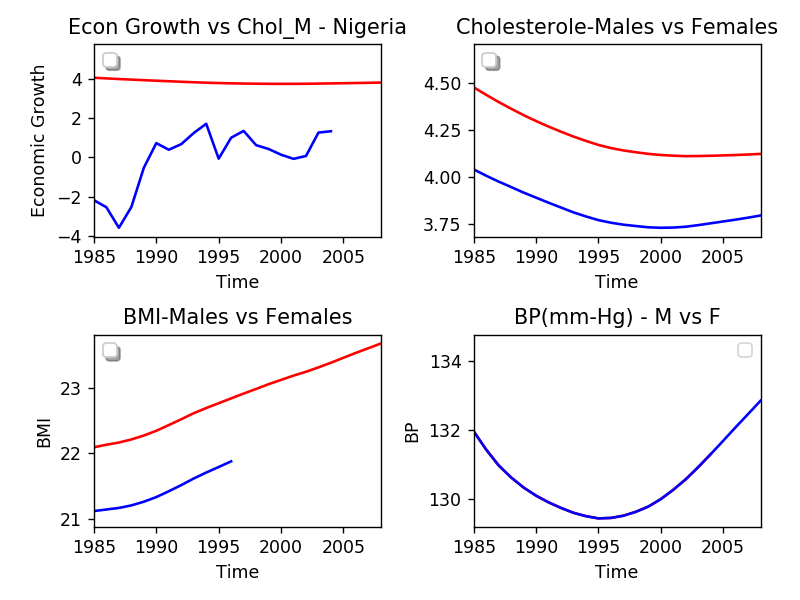

In [130]:
fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.set_title('Econ Growth vs Chol_M - Nigeria')
ax0.set_xlabel('Time')
ax0.set_ylabel('Economic Growth')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax0.legend(( 'Econ Growth','Chol'),loc='upper left', shadow=True)
ax0.set_xlim(1985,2008)
#plt.xticks(np.arange(min(econ_nigeria_plot.Year), max(econ_nigeria_plot.Year)+1, 10.0))
#ax0.set_xlim(1985,2008)
ax0.plot(econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'r')

ax1 = fig.add_subplot(222)
ax1.set_title('Cholesterole-Males vs Females')
ax1.set_xlabel('Time')
ax1.legend(('Chol'),loc='upper left', shadow=True)
ax1.set_xlim(1985,2008)
ax1.plot(cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'b',cholesterol_f_nigeria_plot.Year,cholesterol_f_nigeria_plot.Value,'r')

ax2 = fig.add_subplot(223)
ax2.set_title('BMI-Males vs Females')
ax2.set_xlabel('Time')
ax2.set_ylabel('BMI')
#ax0.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax2.legend(('BMI'),loc='upper left', shadow=True)
ax2.set_xlim(1985,2008)
ax2.plot(bmi_m_nigeria_plot.Year,bmi_m_nigeria_plot.Value,'b',bmi_f_nigeria_plot.Year,bmi_f_nigeria_plot.Value,'r')



ax3 = fig.add_subplot(224)
ax3.set_title('BP(mm-Hg) - M vs F')
ax3.set_xlabel('Time')
ax3.set_ylabel('BP')
#ax1.plot(econ_nigeria_plot.Year, econ_nigeria_plot.Value,'k-')
ax3.legend(('BP'),loc='upper right', shadow=False)
ax3.set_xlim(1985,2008)
ax3.plot(bp_m_nigeria_plot.Year,bp_m_nigeria_plot.Value,'r',bp_f_nigeria_plot.Year,bp_f_nigeria_plot.Value,'b')

#ax1.title('Philippines')
plt.tight_layout()
fig = plt.gcf()

<IPython.core.display.Javascript object>


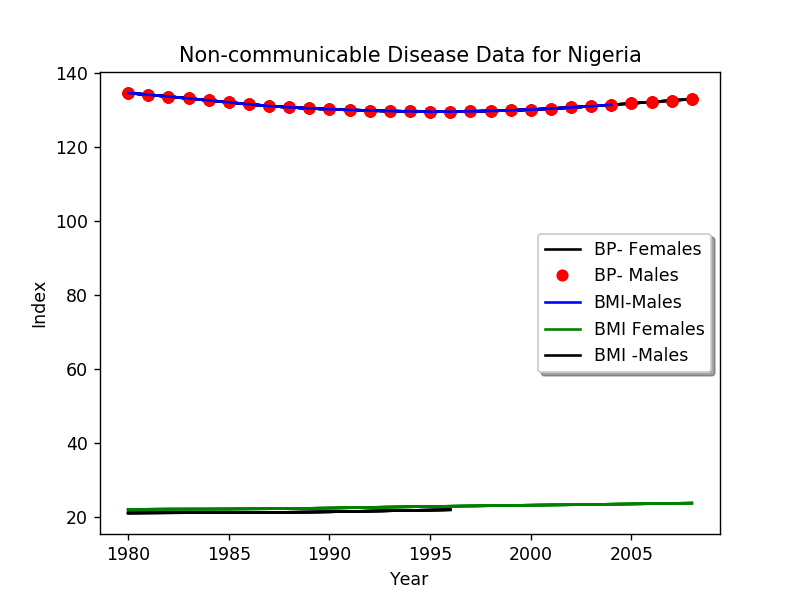

Text(0.5,1,'Economic Growth and Non-communicable Disease Data for Nigeria')

In [38]:
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Index")
plt.plot(cholesterol_m_nigeria_plot.Year,cholesterol_m_nigeria_plot.Value,'y',cholesterol_f_nigeria_plot.Year,cholesterol_f_nigeria_plot.Value,'r',econ_nigeria_plot.Year,econ_nigeria_plot.Value,'b',bmi_f_nigeria_plot.Year,bmi_f_nigeria_plot.Value,'g',bmi_m_nigeria_plot.Year,bmi_m_nigeria_plot.Value,'k')
plt.legend(('Cholesterol - Males', 'Cholesterol - Females','Economic Growth','BMI Females','BMI -Males'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth and Non-communicable Disease Data for Nigeria')

<IPython.core.display.Javascript object>


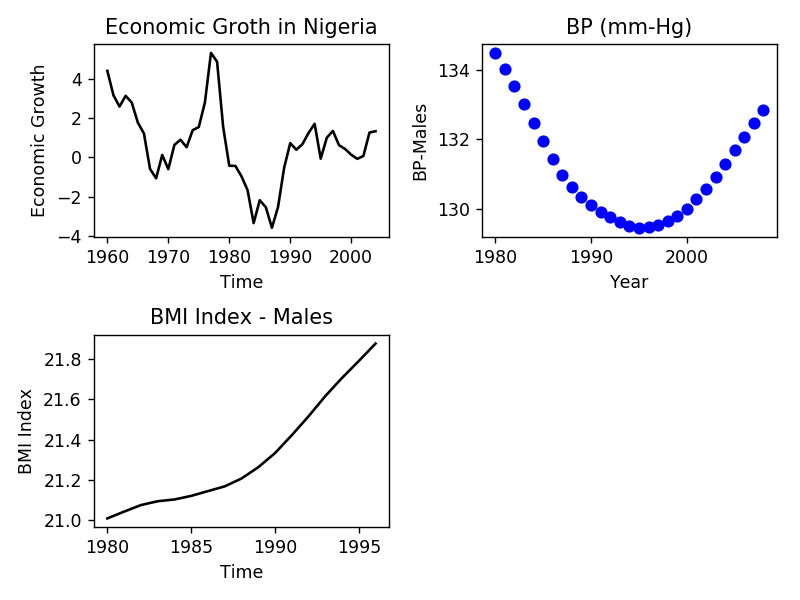

In [72]:
fig = plt.figure()
x0 = econ_nigeria_plot.Year
y0 = econ_nigeria_plot.Value
x1 = bp_f_nigeria_plot.Year
x2 = bmi_m_nigeria_plot.Year
y1 = bp_f_nigeria_plot.Value
y2 = bmi_m_nigeria_plot.Value

ax0 = fig.add_subplot(221)
ax0.set_xlabel("Time")
ax0.set_ylabel("Economic Growth")
ax0.set_title("Economic Groth in Nigeria")
ax0.plot(x0,y0,'k-')

ax1 = fig.add_subplot(222)
ax1.set_ylabel("BP-Males")
ax1.set_xlabel("Year")
ax1.set_title("BP (mm-Hg)")

ax1.plot(x1,y1,'bo')

ax2 = fig.add_subplot(223)
ax2.set_xlabel('Time')
ax2.set_ylabel('BMI Index')
ax2.set_title('BMI Index - Males')
ax2.plot(x2,y2,'k-')


plt.tight_layout()
#fig = plt.gcf()

#plotly_fig = plt.mpl_to_plotly( fig )
#plotly_fig['layout']['title'] = 'Simple Subplot Example Title'
#plotly_fig['layout']['margin'].update({'t':30})

#plot_url = py.plot(plotly_fig, filename='mpl-simple-subplot')



In [336]:
dd_nigeria = econ_nigeria_plot.iloc[20:]
#econ_nigeria_plot.shape
dd_nigeria.tail(2)
chol_m_nigeria = cholesterol_m_nigeria_plot[:-4]
chol_m_nigeria.tail(2)

,Year,Value
2003,2003,3.74231
2004,2004,3.75197


In [33]:
#Scale adjustments
dd_nigeria_plot = econ_nigeria_plot.iloc[20:]
chol_m_nigeria_plot = cholesterol_m_nigeria_plot[:-4]
bmi_m_nigeria_plot = bmi_m_nigeria_plot[:-4] #dataframe changed here...
bp_m_nigeria_plot = bp_m_nigeria_plot[:-4]

In [34]:
dd_philippines_plot = econ_philippines_plot.iloc[20:]
chol_m_philippines_plot = cholesterol_m_philippines_plot[:-4]
bmi_m_philippines_plot = bmi_m_philippines_plot[:-4] #dataframe changed here...
bp_m_philippines_plot = bp_m_philippines_plot[:-4]

<IPython.core.display.Javascript object>


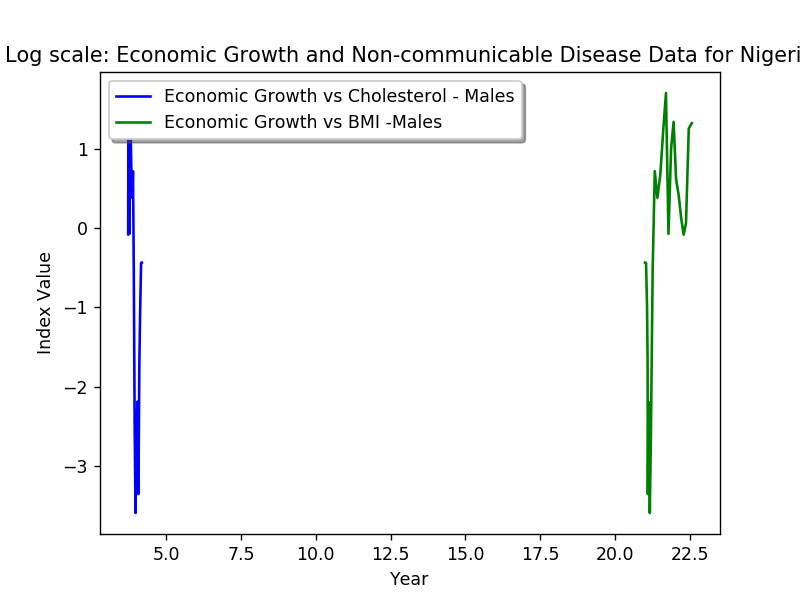

Text(0.5,1,'Log scale: Economic Growth and Non-communicable Disease Data for Nigeria')

In [340]:
# Cholesterol level, ...
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Index Value")                                  
plt.plot(chol_m_nigeria_plot.Value,dd_nigeria_plot.Value,'b',bmi_m_nigeria_plot.Value,dd_nigeria_plot.Value,'g')
#econ_nigeria_plot.Value,bmi_m_nigeria_plot.Value,basex = 10)
plt.legend(('Economic Growth vs Cholesterol - Males','Economic Growth vs BMI -Males'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Log scale: Economic Growth and Non-communicable Disease Data for Nigeria')


<IPython.core.display.Javascript object>


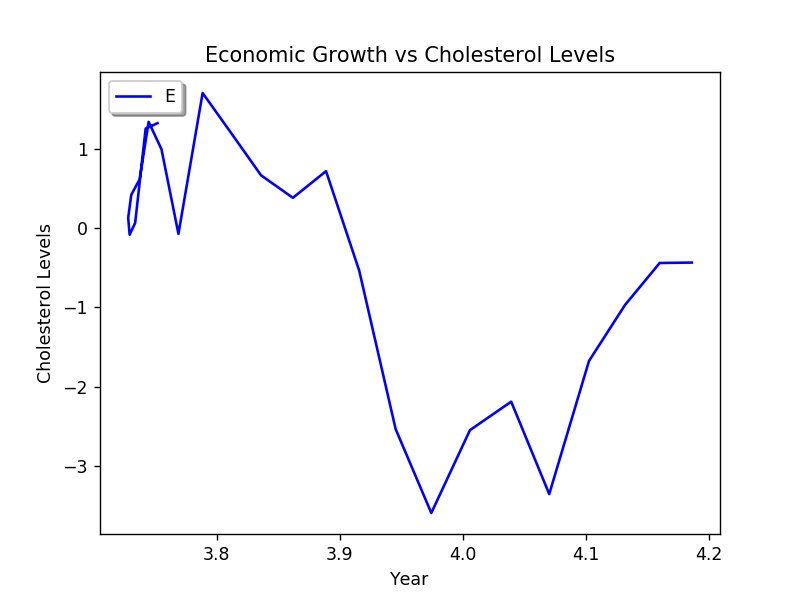

In [343]:
#
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Cholesterol Levels")                                  
plt.plot(chol_m_nigeria_plot.Value,dd_nigeria_plot.Value,'b')
#econ_nigeria_plot.Value,bmi_m_nigeria_plot.Value,basex = 10)
plt.legend(('Economic Growth vs Cholesterol - Males'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth vs Cholesterol Levels')
plt.show()


<IPython.core.display.Javascript object>


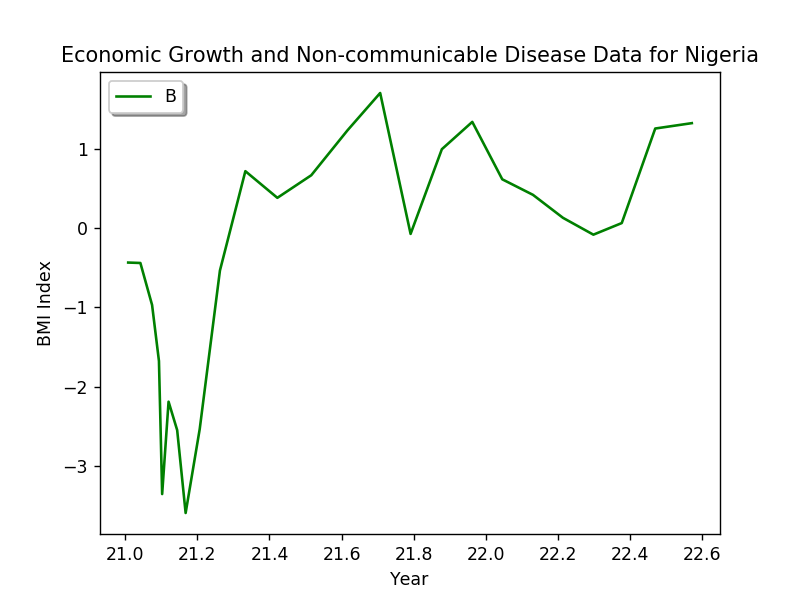

In [344]:
#
plt.subplots()
plt.xlabel("Year")
plt.ylabel("BMI Index")                                  
plt.plot(bmi_m_nigeria_plot.Value,dd_nigeria_plot.Value,'g')
#econ_nigeria_plot.Value,bmi_m_nigeria_plot.Value,basex = 10)
plt.legend(('BMI -Males vs Economic Growth'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth and Non-communicable Disease Data for Nigeria')
plt.show()


Philippines

<IPython.core.display.Javascript object>


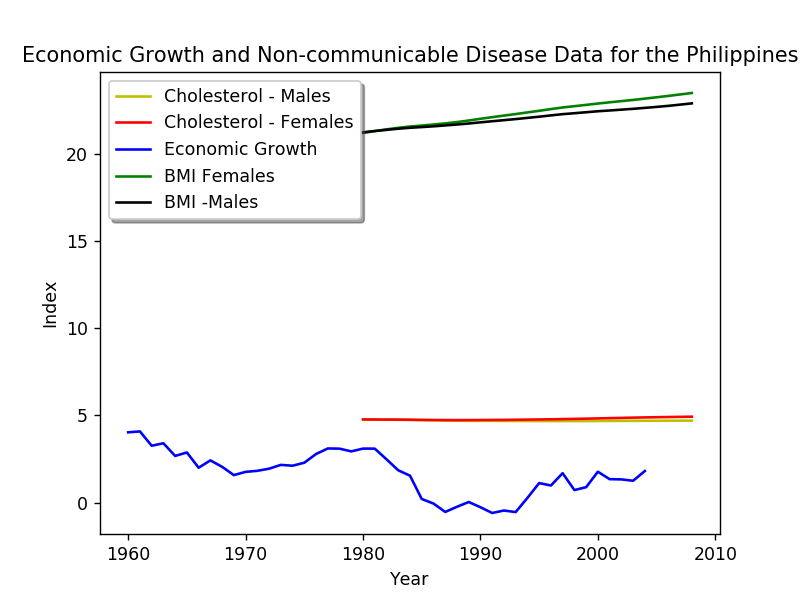

Text(0.5,1,'Economic Growth and Non-communicable Disease Data for the Philippines')

In [153]:
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Index")
plt.plot(cholesterol_m_philippines_plot.Year,cholesterol_m_philippines_plot.Value,'y',cholesterol_f_philippines_plot.Year,cholesterol_f_philippines_plot.Value,'r',econ_philippines_plot.Year,econ_philippines_plot.Value,'b',bmi_f_philippines_plot.Year,bmi_f_philippines_plot.Value,'g',bmi_m_philippines_plot.Year,bmi_m_philippines_plot.Value,'k')
plt.legend(('Cholesterol - Males', 'Cholesterol - Females','Economic Growth','BMI Females','BMI -Males'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth and Non-communicable Disease Data for the Philippines')

<IPython.core.display.Javascript object>


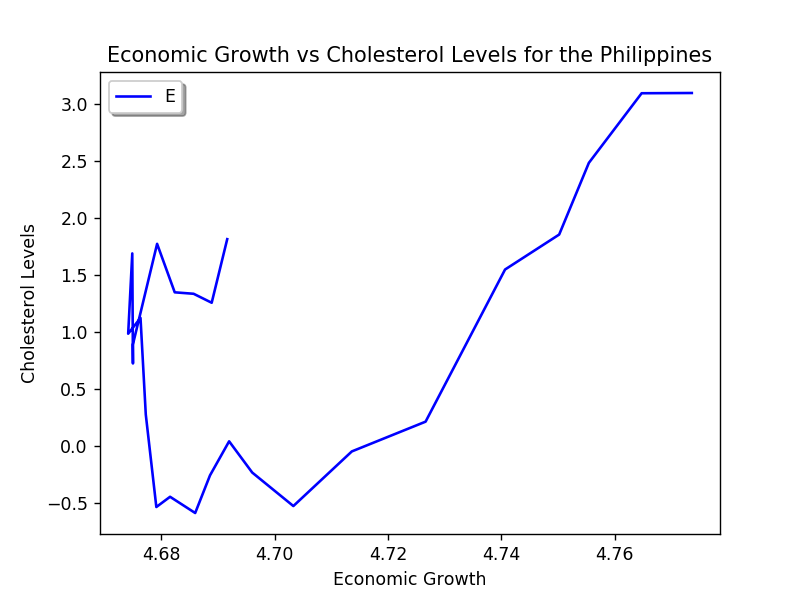

In [347]:
#
plt.subplots()
plt.xlabel("Economic Growth")
plt.ylabel("Cholesterol Levels")                                  
plt.plot(chol_m_philippines_plot.Value,dd_philippines_plot.Value,'b')
#econ_nigeria_plot.Value,bmi_m_nigeria_plot.Value,basex = 10)
plt.legend(('Economic Growth vs Cholesterol - Males'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth vs Cholesterol Levels for the Philippines')
plt.show()

<IPython.core.display.Javascript object>


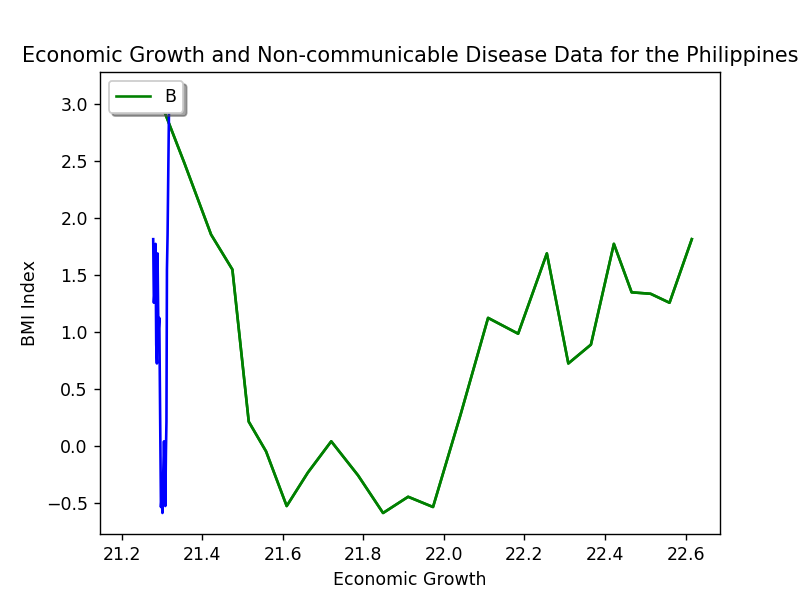

In [348]:
#
plt.subplots()
plt.xlabel("Economic Growth")
plt.ylabel("BMI Index")                                  
plt.plot(bmi_m_philippines_plot.Value,dd_philippines_plot.Value,'g')
#econ_nigeria_plot.Value,bmi_m_nigeria_plot.Value,basex = 10)
plt.legend(('BMI -Males vs Economic Growth'),loc='upper left', shadow=True)
#plt.xlim(1980,2008)

plt.title('Economic Growth and Non-communicable Disease Data for the Philippines')
plt.show()


In [351]:
#MODELING....
from sklearn.linear_model import LinearRegression


In [369]:
model = LinearRegression().fit(dd_philippines_plot[['Value']],bmi_m_philippines_plot[['Value']])
m = model.coef_[0]
b = model.intercept_
#Equation of the line
print("Y = "+ str(round(m[0],2))+ "X + "+ str(round(b[0],2)))

predictions = model.predict(bmi_m_philippines_plot[['Value']])

Y = -0.03X + 21.95


In [371]:
pred_df = pd.DataFrame(data=predictions,index=bmi_m_philippines_plot.index.values,columns = ['PrValues'])
joint_pred = bmi_m_philippines_plot.join(pred_df, how='inner')
joint_pred.head()

,Year,Value,PrValues
1980,1980,21.2165,21.320402
1981,1981,21.2887,21.318243
1982,1982,21.3558,21.316237
1983,1983,21.4222,21.314250
1984,1984,21.4751,21.312668


In [375]:
brtm[(brtm["Nation"]=='South Africa')]

,Nation,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
146,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.72,12.23,11.22,11.89,10.53,11.0,11.38,11.28,12.33,11.49


In [380]:
#Using the scipy stats library for analysis
from scipy.stats import *

In [385]:
x=[1,2,3,4]
y=[3,5,6,8]
slope,intercept,r_value,p_value, std_err = linregress(x,y)
print(r_value)

0.9922778767136677


In [72]:
physicians_per_1000.head(4)

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.034844,NaN,NaN,NaN,NaN,0.063428,NaN,NaN,NaN,...,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.21,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.276291,NaN,NaN,NaN,NaN,0.481283,NaN,NaN,NaN,...,1.305,NaN,NaN,NaN,1.15,1.146,NaN,NaN,NaN,NaN


Subset the datssets for analysis
Handling of missing data: remove them......

In [74]:
full_econ=econ_df.dropna()
full_econ.shape

(35, 46)

In [13]:
full_malaria=malaria_df.dropna()
full_malaria

,Nation,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
29,Nigeria,2.418101,2.002117,1.066902,0.689200,1.590743,2.997888,4.258586,3.995909,5.236272,3.392253,4.541862,3.371639,3.115668,3.967789,4.370980,4.594072,4.550858
34,South Africa,0.095687,0.050677,0.036377,0.113866,0.029600,0.106013,0.384424,0.240541,0.449905,0.907698,1.008849,0.258599,0.206093,0.301558,0.187207,0.133504,0.180190
92,Cambodia,10.518079,11.583747,13.554515,10.247350,9.112971,5.388506,6.367572,6.764458,5.063730,7.113022,4.757594,3.654931,3.446779,3.647328,2.784201,2.121026,2.789398
94,Laos,9.125927,10.881849,10.127758,9.393562,13.317577,13.213122,12.646680,12.320251,8.496973,6.592484,6.699885,4.590304,3.609490,3.407914,1.883903,1.359485,0.364621
97,Philippines,1.491197,1.474393,1.347213,1.236106,1.168489,0.937495,0.764830,0.718087,0.767528,1.011613,0.703292,0.564022,0.123286,0.199575,0.201525,0.171463,0.126357
99,Solomon Islands,10.522959,14.256493,9.938382,11.705079,13.933359,14.095718,8.061201,7.054987,8.387279,5.687959,9.147237,12.892005,13.472134,15.800179,7.377512,8.043707,2.479231
101,Viet Nam,5.047411,6.868292,3.807627,1.453538,0.838938,0.474569,0.272210,0.200684,0.238105,0.243701,0.187118,0.113387,0.061395,0.060504,0.028626,0.021169,0.047561


In [14]:
full_econ.head()

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
5,Argentina,1.034709,0.987920,1.693886,1.113861,1.456219,1.682503,1.543136,1.413496,1.254854,...,1.653032,1.359093,1.890147,2.603356,3.188898,3.248900,1.624812,-0.501000,-0.349825,-0.020874
7,Australia,1.531285,1.495082,2.593973,2.179424,2.090947,1.954065,2.509567,2.713969,2.884724,...,1.696171,1.891908,1.883067,2.098839,2.135307,2.377419,2.673909,2.687172,2.724653,2.434977
8,Austria,5.419929,5.258348,5.513047,5.532958,5.225725,4.486635,4.648580,4.281330,4.299003,...,1.994369,2.029927,2.079918,2.081208,2.007093,1.967533,1.793202,1.706536,1.837291,1.926891
15,Belgium,2.499376,2.596478,2.903306,3.075315,3.306780,3.238951,3.259510,3.472593,4.032420,...,2.137006,2.029398,2.117267,1.799325,1.733330,1.793814,1.721581,1.715341,1.919656,1.876115
30,Canada,1.386794,1.117637,1.101615,1.312752,2.305860,2.269594,2.128923,2.274370,2.652114,...,1.119472,1.057128,1.144876,1.158580,1.512022,2.107527,2.559122,2.785648,2.745133,2.512726


In [15]:
#check economic growth for Canada, Nigeria
econ_can = full_econ[(full_econ['Nation']=='Canada')]
econ_can

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
30,Canada,1.386794,1.117637,1.101615,1.312752,2.30586,2.269594,2.128923,2.27437,2.652114,...,1.119472,1.057128,1.144876,1.15858,1.512022,2.107527,2.559122,2.785648,2.745133,2.512726


In [16]:
df=econ_can.T


In [17]:
ff=df.drop([df.index[0]])
ff.columns=["Value"]

In [18]:
ff["Year"]=range(1960,2005,1)

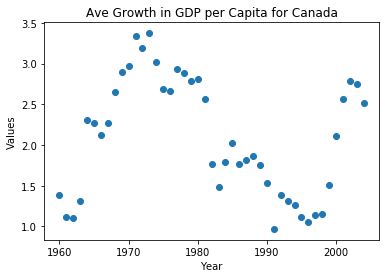

In [19]:
graph = plt.scatter(ff.Year,ff.Value)
plt.figure(1)
plt.xlabel("Year")
plt.ylabel("Values")
plt.title('Ave Growth in GDP per Capita for Canada')
plt.show()

Country: Nigeria

In [20]:
econ_nigeria = full_econ[(full_econ['Nation']=='Nigeria')]
econ_nigeria

,Nation,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
124,Nigeria,4.390345,3.148914,2.574648,3.120009,2.779442,1.759564,1.206135,-0.592637,-1.071925,...,-0.0737,0.992307,1.336106,0.613551,0.417907,0.12864,-0.083353,0.062699,1.252725,1.320333


In [21]:
malaria_nigeria = full_malaria[(full_malaria['Nation']=='Nigeria')]

malaria_nigeria

,Nation,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
29,Nigeria,2.418101,2.002117,1.066902,0.6892,1.590743,2.997888,4.258586,3.995909,5.236272,3.392253,4.541862,3.371639,3.115668,3.967789,4.37098,4.594072,4.550858


In [22]:
df_econ_nigeria=econ_nigeria.T
df_econ_nigeria=df_econ_nigeria.drop([df.index[0]])
df_econ_nigeria.columns=["Value"]
df_econ_nigeria["Year"]=range(1960,2005,1)

df_malaria_nigeria=malaria_nigeria.T
df_malaria_nigeria=df_malaria_nigeria.drop([df.index[0]])
df_malaria_nigeria.columns=["Value"]
df_malaria_nigeria["Year"]=range(1990,2007,1)


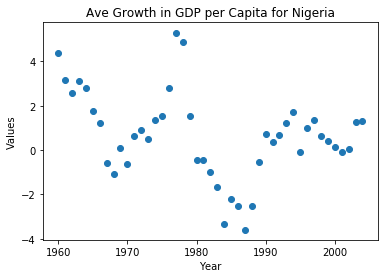

In [34]:
#Scatter plot of the economic data
graph = plt.scatter(df_econ_nigeria.Year,df_econ_nigeria.Value,label="Economic Growth")
plt.figure(1)
plt.xlabel("Year")
plt.ylabel("Values")
plt.title('Ave Growth in GDP per Capita for Nigeria')
plt.show()


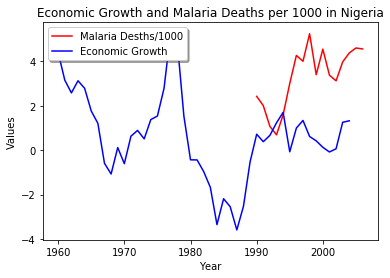

In [43]:
plt.figure(3)
plt.subplots()
plt.xlabel("Year")
plt.ylabel("Values")
plt.plot(df_malaria_nigeria.Year,df_malaria_nigeria.Value,'r',df_econ_nigeria.Year,df_econ_nigeria.Value,'b')
plt.legend(('Malaria Desths/1000', 'Economic Growth'),loc='upper left', shadow=True)

plt.title('Economic Growth and Malaria Deaths per 1000 in Nigeria')
plt.show()

Cholesterol Variation

In [46]:
cholesterol_f_df=pd.read_excel("data/TC_female_ASM.xlsx")
cholesterol_m_df=pd.read_excel("data/TC_male_ASM.xlsx")
full_chol_f = cholesterol_f_df.dropna()
full_chol_m = cholesterol_m_df.dropna()

In [50]:
chol_can_f = full_chol_f[(full_chol_f.Nation=='Canada')]
chol_can_m = full_chol_m[(full_chol_f.Nation=='Canada')]


In [25]:
df=econ_can.T

In [152]:
df.head(2)

,30
Nation,Canada
1960,1.38679


In [153]:
ff=df.drop([df.index[0]])
ff.columns=["Value"]

In [164]:
ff.head(4)

,Value,Year
1960,1.38679,1960
1961,1.11764,1961
1962,1.10161,1962
1963,1.31275,1963


In [162]:
ff["Year"]=range(1960,2005,1)


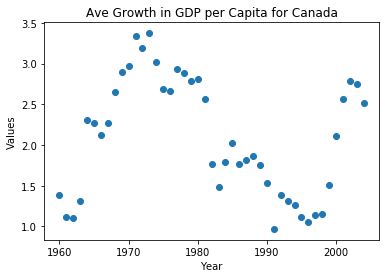

In [180]:
graph = plt.scatter(ff.Year,ff.Value)
plt.figure(1)
plt.xlabel("Year")
plt.ylabel("Values")
plt.title('Ave Growth in GDP per Capita for Canada')
plt.show()

Cholest